# Stock Kelly Geometric Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [10]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = 'HDFCBANK.NS' #input

In [11]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [12]:
stocks_returns = stocks.pct_change().dropna()

In [13]:
def kelly_fraction(stock_returns):
    # returns = np.array(stock_returns)
    wins = stock_returns[stock_returns > 0]
    losses = stock_returns[stock_returns <= 0]
    W = len(wins) / len(stock_returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ( (1 - W) / R )
    return kelly_f

def expected_geom(stock_returns):
    stock_returns = np.array(stock_returns)
    expected_geom = np.product(1 + stock_returns) ** (1 / len(stock_returns)) - 1
    return expected_geom

def kelly_geometric(stock_returns):
    bounded_rets = stock_returns / np.abs(np.min(stock_returns))
    kelly_f = kelly_fraction(bounded_rets) / np.abs(np.min(stock_returns))
    exp_geom_kelly = expected_geom(bounded_rets * kelly_f)
    return exp_geom_kelly

Text(0, 0.5, 'Kelly Geometric')

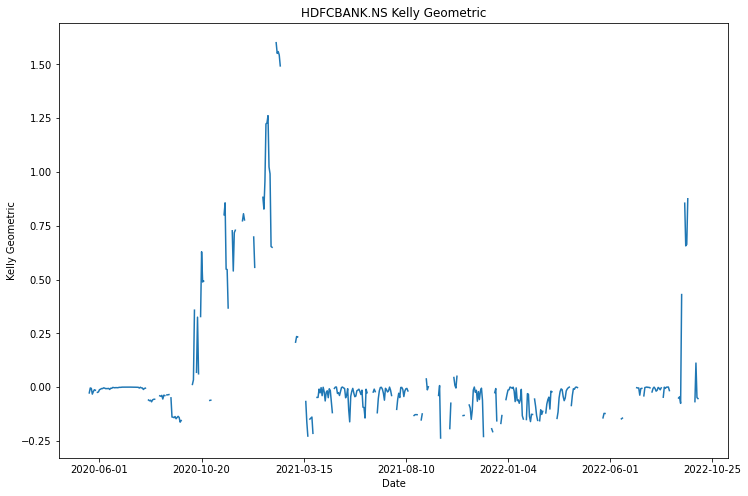

In [14]:
# Compute the running Kelly Geometric
running = [kelly_geometric(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Kelly Geometric up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kelly Geometric')
plt.xlabel('Date')
plt.ylabel('Kelly Geometric')

In [15]:
kg = kelly_geometric(stocks_returns)
kg

0.00013624974473325224

In [16]:
running

[-0.02742249131250296,
 -0.004304032473403829,
 -0.0059900002469485125,
 -0.03298335484265702,
 -0.02108856075490162,
 -0.01249215669679693,
 -0.014845021107729783,
 nan,
 -0.024690247026312395,
 -0.022771105892241073,
 -0.012337994516348427,
 -0.01027655131393379,
 -0.007040459602353777,
 -0.00724482846712915,
 -0.003860906103527073,
 -0.004897482971338629,
 -0.007352087650174366,
 -0.007345547876215441,
 -0.0071558805133248304,
 -0.006409658983492994,
 -0.011248232329287289,
 -0.005501446519059816,
 -0.00599846820080574,
 -0.0017874393475446615,
 -0.0026738456528164756,
 -0.003426363833488155,
 -0.0026392730756351623,
 -0.0030110385078848667,
 -0.0031231311052284383,
 -0.0017558613397882228,
 -0.0013074916558396543,
 -0.001416952137658467,
 -0.000525809587804793,
 -0.0004395568378026127,
 -0.0006687960289240014,
 -0.00034859759101846244,
 -0.00021818658555150527,
 -0.00010678626379401202,
 -3.046114709359671e-07,
 -7.222741807455524e-05,
 -0.00034648063168840615,
 -0.0003753772312288

In [9]:
print('Expected Value (Geometric): {}%'.format(np.round(kelly_geometric(stocks_returns) * 100, 5)))

Expected Value (Geometric): 0.02845%
